## IV. Modelling

### 1. Predicting outputs with multiple values 

In [88]:
# Classifiers 
from  sklearn.tree  import  DecisionTreeClassifier 
from  sklearn.ensemble  import  RandomForestClassifier ,  GradientBoostingClassifier 
from  sklearn.linear_model  import  LogisticRegression
from sklearn.svm import LinearSVC

# Metrics & Corss-Validation 
from  sklearn.model_selection  import   train_test_split 
from  sklearn.metrics  import  ( accuracy_score ,  precision_score ,  recall_score ,  f1_score , 
                             classification_report ,  confusion_matrix )

import  warnings 
warnings . filterwarnings ( 'ignore' )

In [89]:
# Merging DataFrame in order to create a global one. 
df = pd . merge ( merge_caracUsagers1 ,  df_places ,  how = 'inner' ,  on = 'Num_Acc' )


In [90]:
df_places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839985 entries, 0 to 839984
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Num_Acc  839985 non-null  int64  
 1   catr     839984 non-null  float64
 2   voie     780914 non-null  object 
 3   v1       332816 non-null  float64
 4   v2       33953 non-null   object 
 5   circ     839187 non-null  float64
 6   nbv      838195 non-null  float64
 7   pr       414770 non-null  float64
 8   pr1      413463 non-null  float64
 9   vosp     838345 non-null  float64
 10  prof     838924 non-null  float64
 11  plan     838909 non-null  float64
 12  lartpc   830440 non-null  float64
 13  larrout  831706 non-null  float64
 14  surf     838968 non-null  float64
 15  infra    838707 non-null  float64
 16  situ     838983 non-null  float64
 17  env1     838709 non-null  float64
dtypes: float64(15), int64(1), object(2)
memory usage: 115.4+ MB


In [91]:
dfglobal =  df [[ 'Num_Acc' , 'year' , 'month' , 'day' , 'hour' , 'agg' , 'lum' , 'dep' , 'int' ,  'atm' , 'catr' , 'catu' , 'sexe' , 'secu' , 'grav' , 'situ' , 
                   'plan' , 'env1', 'prof' ]] 
dfglobal = dfglobal. dropna ()

In [92]:
# Converting float to int 
for  col  in  dfglobal . columns : 
    dfglobal [ col ]  =  dfglobal [ col ] . apply ( lambda  x :  int ( x )  )

dfglobal . head ()

,Num_Acc,year,month,day,hour,agg,lum,dep,int,atm,catr,catu,sexe,secu,grav,situ,plan,env1,prof
0,201600000001,2016,2,1,14,2,1,590,1,8,3,1,2,11,1,1,3,0,1
1,201600000001,2016,2,1,14,2,1,590,1,8,3,1,1,21,3,1,3,0,1
2,201600000002,2016,3,16,18,2,1,590,6,1,3,1,1,11,3,1,2,0,1
3,201600000002,2016,3,16,18,2,1,590,6,1,3,2,1,11,3,1,2,0,1
4,201600000002,2016,3,16,18,2,1,590,6,1,3,2,2,11,3,1,2,0,1


In [93]:
X  =  dfglobal . drop ([ 'grav' ],  axis = 1 ) 
y  =  dfglobal [ 'grav' ]

# Splitting the dataset into trainning and testing data with a ratio of 75/25 
X_train ,  X_test ,  y_train ,  y_test  =  train_test_split ( X ,  y ,  test_size = 0.25 ,  random_state = 42 )

### Random Forest Classifier 

In [94]:
rfc = RandomForestClassifier ( max_depth =  10 ,  n_estimators = 5 ,   random_state = 0 ) 
rfc . fit ( X_train , y_train )

# Prediction 
pred_rfc = rfc . predict ( X_test )

score_rfc  =  rfc . score ( X_test ,  y_test ) 
print ( "Score of the random forest classifier: % .3f "  %  score_rfc )

Score of the random forest classifier:  0.604 


In [95]:
print ( classification_report ( y_test ,  pred_rfc ))

              precision    recall  f1-score   support

           1       0.63      0.84      0.72    190514
           2       0.43      0.00      0.00     11800
           3       0.52      0.29      0.37     93659
           4       0.58      0.55      0.57    161264

    accuracy                           0.60    457237
   macro avg       0.54      0.42      0.42    457237
weighted avg       0.59      0.60      0.58    457237



### Logistic Regression

In [96]:
# All parameters not specified are set to their defaults 
lr  =  LogisticRegression () 
lr . fit ( X_train ,  y_train )

# Prediction 
pred_lr = lr . predict ( X_test )

# Use score method to get accuracy of model 
score_lr  =  lr . score ( X_test ,  y_test ) 
print ( "Score of the logistic regression: % .3f "  %  score_lr )

Score of the logistic regression:  0.417 


In [97]:
print ( classification_report ( y_test ,  pred_lr ))

              precision    recall  f1-score   support

           1       0.42      1.00      0.59    190514
           2       0.00      0.00      0.00     11800
           3       0.00      0.00      0.00     93659
           4       0.00      0.00      0.00    161264

    accuracy                           0.42    457237
   macro avg       0.10      0.25      0.15    457237
weighted avg       0.17      0.42      0.25    457237



### Decision Tree

In [98]:
dt = DecisionTreeClassifier ( min_samples_split = 5 , min_samples_leaf = 15 , max_leaf_nodes = 30 ) 
dt . fit ( X_train , y_train )

# Prediction 
pred_dt = dt . predict ( X_test )

score_dt  =  dt . score ( X_test ,  y_test ) 
print ( "Score of the decision tree: % .3f "  %  score_dt )

Score of the decision tree:  0.595 


In [99]:
print ( classification_report ( y_test ,  pred_dt ))

              precision    recall  f1-score   support

           1       0.63      0.82      0.71    190514
           2       0.00      0.00      0.00     11800
           3       0.51      0.28      0.36     93659
           4       0.57      0.55      0.56    161264

    accuracy                           0.60    457237
   macro avg       0.43      0.41      0.41    457237
weighted avg       0.57      0.60      0.57    457237



### Gradient Boosting Classifier 

In [124]:
gbc  =  GradientBoostingClassifier ( n_estimators = 100 ,  learning_rate = 0.2 , max_depth = 10 ,  random_state = 0 )

gbc . fit ( X_train ,  y_train )

# Prediction 
pred_gbc = gbc . predict ( X_test )

score_gbc  =  gbc . score ( X_test ,  y_test ) 
print ( "Score of the gradient boosting classifier: % .3f "  %  score_gbc )

Score of the gradient boosting classifier:  0.970 


In [125]:
print ( classification_report ( y_test ,  pred_gbc ))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    456294
           1       0.26      0.06      0.09     12708

    accuracy                           0.97    469002
   macro avg       0.62      0.53      0.54    469002
weighted avg       0.95      0.97      0.96    469002



### SVM

In [102]:
svc = LinearSVC()
svc.fit(X_train, y_train)

# Prediction 
pred_svm = svc. predict ( X_test )

score_dt  =  svc. score ( X_test ,  y_test ) 
print ( "Score of the decision tree: % .3f "  %  score_dt )

Score of the decision tree:  0.417 


In [103]:
print ( classification_report ( y_test ,  pred_svm ))

              precision    recall  f1-score   support

           1       0.42      1.00      0.59    190514
           2       0.00      0.00      0.00     11800
           3       0.00      0.00      0.00     93659
           4       0.00      0.00      0.00    161264

    accuracy                           0.42    457237
   macro avg       0.10      0.25      0.15    457237
weighted avg       0.17      0.42      0.25    457237



### Naive Bayes

In [99]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)
score_nb  =  gnb. score ( X_test ,  y_test )

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.4166635683463937


In [100]:
print ( classification_report ( y_test ,  y_pred ))

              precision    recall  f1-score   support

           1       0.42      1.00      0.59    190514
           2       0.00      0.00      0.00     11800
           3       0.00      0.00      0.00     93659
           4       0.00      0.00      0.00    161264

    accuracy                           0.42    457237
   macro avg       0.10      0.25      0.15    457237
weighted avg       0.17      0.42      0.25    457237



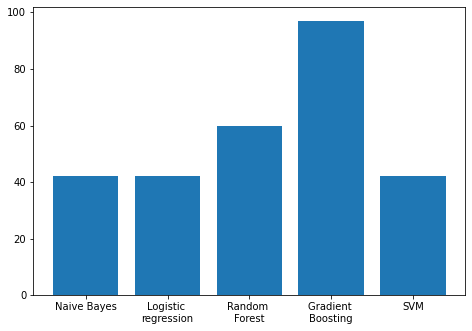

In [126]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,10,1,1])
models = ['Naive Bayes', 'Logistic \nregression', 'Random \nForest', 'Gradient \nBoosting', 'SVM']
Accuracy = [42,42,60,97,42]
ax.bar(models,Accuracy)
plt.show()

### 2. Predicting output with a unique value

#### Predicting those killed in the crash

In [120]:
dfglobal1 =  df [[ 'Num_Acc' , 'year' , 'month' , 'day' , 'hour' , 'agg' , 'lum' , 'dep' , 'int' ,  'atm' , 'catr'  , 
                     'catu' , 'sexe' , 'secu' , 'grav_2' , 'situ' , 
                   'plan' , 'env1']]

In [121]:
# Converting float into int 
dfglobal1  =  dfglobal1 . fillna ( 0 ) 
for  col  in  dfglobal1 . columns : 
    dfglobal1 [ col ]  =  dfglobal1 [ col ] . astype ( int )

dfglobal1 . head ()


,Num_Acc,year,month,day,hour,agg,lum,dep,int,atm,catr,catu,sexe,secu,grav_2,situ,plan,env1
0,-263462911,2016,2,1,14,2,1,590,1,8,3,1,2,11,0,1,3,0
1,-263462911,2016,2,1,14,2,1,590,1,8,3,1,1,21,0,1,3,0
2,-263462910,2016,3,16,18,2,1,590,6,1,3,1,1,11,0,1,2,0
3,-263462910,2016,3,16,18,2,1,590,6,1,3,2,1,11,0,1,2,0
4,-263462910,2016,3,16,18,2,1,590,6,1,3,2,2,11,0,1,2,0


In [122]:
X  =  dfglobal1 . drop ([ 'grav_2' ],  axis = 1 ) 
y  =  dfglobal1 [ 'grav_2' ]

# Splitting the dataset into trainning and testing data with a ratio of 75/25 
X_train ,  X_test ,  y_train ,  y_test  =  train_test_split ( X ,  y ,  test_size = 0.25 ,  random_state = 42 )

### Logistic regression 

In [105]:
# all parameters not specified are set to their defaults 
lr  =  LogisticRegression () 
lr . fit ( X_train ,  y_train ) 
pred = lr . predict ( X_test ) 
pred

# Use score method to get accuracy of model 
score_lr  =  lr . score ( X_test ,  y_test ) 
print ( "Score of the logistic regression: % .3f "  %  score_lr )

Score of the logistic regression:  0.973 


In [106]:
lr_predict  =  lr . predict ( X_test ) 
lr_predict_proba = lr . predict_proba ( X_test )

print ( lr_predict_proba [:, 1 ])

[0.01917731 0.00199882 0.01224198 ... 0.04638218 0.019173   0.00199854]


In [107]:
lr_confusion_matrix  =  confusion_matrix ( y_test ,  pred )

print ( lr_confusion_matrix )

[[456294      0]
 [ 12708      0]]


In [108]:
print ( classification_report ( y_test ,  lr_predict ))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    456294
           1       0.00      0.00      0.00     12708

    accuracy                           0.97    469002
   macro avg       0.49      0.50      0.49    469002
weighted avg       0.95      0.97      0.96    469002



In [109]:
# Receiver Operating Characteristics for the logistic regression 
from  sklearn.metrics  import  auc 
from  sklearn.metrics  import  roc_curve

fpr_lr ,  tpr_lr ,  thresholds_fr  =  roc_curve ( y_test ,  lr_predict_proba [:, 1 ]) 
lr_auc  =  auc ( fpr_lr ,  tpr_lr )

### Random Forest 

In [112]:
rf  =  RandomForestClassifier ( max_depth = 3 ,  n_estimators = 10 ) 
rf . fit ( X_train ,  y_train )

# Use score method to get accuracy of model 
score_rf  =  rf . score ( X_test ,  y_test ) 
print ( "Score of the random forest classifier: % .3f "  %  score_rf )

rf_predict  =  rf . predict ( X_test ) 
rf_predict_proba = rf . predict_proba ( X_test )

Score of the random forest classifier:  0.973 


In [113]:
print ( classification_report ( y_test ,  rf_predict ))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    456294
           1       0.00      0.00      0.00     12708

    accuracy                           0.97    469002
   macro avg       0.49      0.50      0.49    469002
weighted avg       0.95      0.97      0.96    469002



In [114]:
# Receiver Operating Characteristics for random forest 
fpr_rf ,  tpr_rf ,  thresholds_rf  =  roc_curve ( y_test ,  rf_predict_proba [:, 1 ]) 
rf_auc  =  auc ( fpr_rf ,  tpr_rf )

### Gradient Boosting 

In [115]:
gbc  =  GradientBoostingClassifier ( n_estimators = 100 ,  learning_rate = 1.0 , max_depth = 1 ,  random_state = 0 ) 
gbc . fit ( X_train ,  y_train )

# Use score method to get accuracy of model 
score_gbc = gbc . score ( X_test ,  y_test ) 
print ( "Score of the gradient boosting classifier: % .3f "  %  score_gbc )

gbc_predict  =  gbc . predict ( X_test ) 
gbc_predict_proba = gbc . predict_proba ( X_test )

Score of the gradient boosting classifier:  0.973 


### SVM

In [152]:
svm  =  LinearSVC() 
svm . fit ( X_train ,  y_train )

# Use score method to get accuracy of model 
score_svm  =  svm . score ( X_test ,  y_test ) 
print ( "Score of the random forest classifier: % .3f "  %  score_rf )

svm_predict  =  svm . predict ( X_test ) 

Score of the random forest classifier:  0.790 


In [153]:
print ( classification_report ( y_test ,  svm_predict ))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88    370488
           1       0.00      0.00      0.00     98514

    accuracy                           0.79    469002
   macro avg       0.39      0.50      0.44    469002
weighted avg       0.62      0.79      0.70    469002



### Naive Bayes

In [123]:
### Naiva Bayes
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)
score_nb  =  gnb. score ( X_test ,  y_test )

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9729041667199714


In [124]:
print ( classification_report ( y_test ,  y_pred ))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    456294
           1       0.00      0.00      0.00     12708

    accuracy                           0.97    469002
   macro avg       0.49      0.50      0.49    469002
weighted avg       0.95      0.97      0.96    469002



In [154]:
from  sklearn.metrics  import  classification_report

print ( classification_report ( y_test ,  gbc_predict ))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88    370488
           1       0.57      0.19      0.28     98514

    accuracy                           0.80    469002
   macro avg       0.69      0.57      0.58    469002
weighted avg       0.76      0.80      0.76    469002



In [155]:
# Receiver Operating Characteristics for Gradient Boosting Classifier 
from  sklearn.metrics  import  auc 
from  sklearn.metrics  import  roc_curve

fpr_gbc ,  tpr_gbc ,  thresholds_gbc  =  roc_curve ( y_test ,  gbc_predict_proba [:, 1 ]) 
gbc_auc  =  auc ( fpr_gbc ,  tpr_gbc )

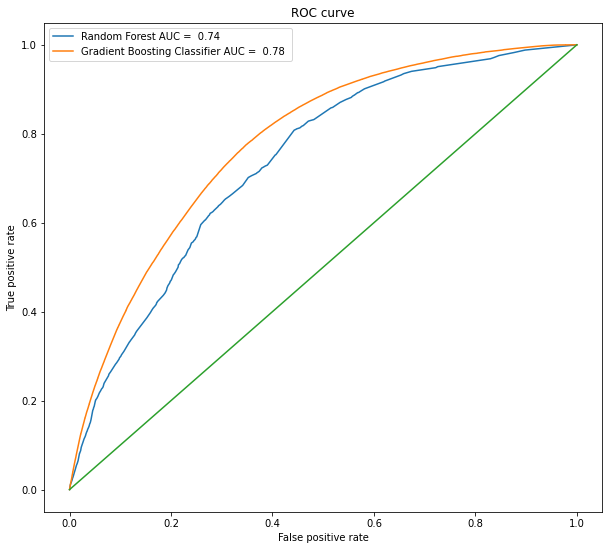

In [157]:
# Display the ROC curce

fig  =  plt . figure ( figsize = ( 10 , 9 ))

plt . plot ( fpr_rf ,  tpr_rf ,  label = 'Random Forest AUC = % 0.2f '  % rf_auc )
plt . plot ( fpr_gbc ,  tpr_gbc ,  label = 'Gradient Boosting Classifier AUC = % 0.2f '  % gbc_auc )

plt . plot ([ 0 , 1 ], [ 0 , 1 ],  linestyle = '-' ) 
plt . xlabel ( 'False positive rate' ) 
plt . ylabel ( 'True positive rate' ) 
plt . title ( 'ROC curve' ) 
plt . legend ( loc = 'best' ) 
plt . show ()

fig . savefig ( r"C:\Users\manas\OneDrive\Documents\STEVENS\sem 2\KDD\final project\results\ ROC_grav_2.png" )

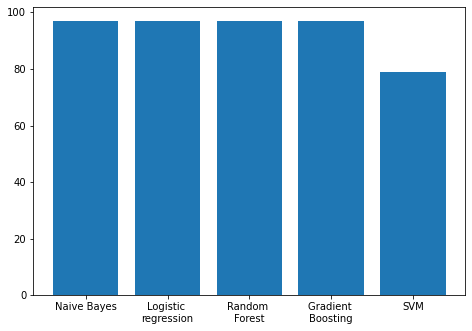

In [127]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,10,1,1])
models = ['Naive Bayes', 'Logistic \nregression', 'Random \nForest', 'Gradient \nBoosting', 'SVM']
Accuracy = [97,97,97,97,79]
ax.bar(models,Accuracy)
plt.show()

### Predicting those hospitalized injured 

In [110]:
dfglobal2 =  df [[ 'Num_Acc' , 'year' , 'month' , 'day' , 'hour' , 'agg' , 'lum' , 'dep' , 'int' ,  'atm' , 'catr' ,  
                     'catu' , 'sexe' , 'secu' , 'grav_3' , 'situ' , 
                   'plan' , 'env1' ]]

In [111]:
# Converting float into int 
dfglobal2  =  dfglobal2 . fillna ( 0 ) 
for  col  in  dfglobal2 . columns : 
    dfglobal2 [ col ]  =  dfglobal2 [ col ] . astype ( int )

In [112]:
X  =  dfglobal2 . drop ([ 'grav_3' ],  axis = 1 ) 
y  =  dfglobal2 [ 'grav_3' ]

# Splitting the dataset into trainning and testing data with a ratio of 75/25 
X_train ,  X_test ,  y_train ,  y_test  =  train_test_split ( X ,  y ,  test_size = 0.25 ,  random_state = 42 )

### Logistic regression 

In [113]:
# all parameters not specified are set to their defaults 
lr  =  LogisticRegression () 
lr . fit ( X_train ,  y_train ) 
pred = lr . predict ( X_test ) 
pred

# Use score method to get accuracy of model 
score_lr  =  lr . score ( X_test ,  y_test ) 
print ( "Score of the logistic regression: % .3f "  %  score_lr )

lr_predict  =  lr . predict ( X_test ) 
lr_predict_proba = lr . predict_proba ( X_test )

print ( lr_predict_proba [:, 1 ])

Score of the logistic regression:  0.790 
[0.23503299 0.13429594 0.21134389 ... 0.28765928 0.23502064 0.13429094]


In [114]:
lr_confusion_matrix  =  confusion_matrix ( y_test ,  pred )

print ( lr_confusion_matrix )

[[370488      0]
 [ 98514      0]]


In [115]:
print ( classification_report ( y_test ,  lr_predict ))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88    370488
           1       0.00      0.00      0.00     98514

    accuracy                           0.79    469002
   macro avg       0.39      0.50      0.44    469002
weighted avg       0.62      0.79      0.70    469002



In [116]:
# Receiver Operating Characteristics for the logistic regression 
fpr_lr ,  tpr_lr ,  thresholds_fr  =  roc_curve ( y_test ,  lr_predict_proba [:, 1 ]) 
lr_auc  =  auc ( fpr_lr ,  tpr_lr )

### Random forest

In [169]:
rf  =  RandomForestClassifier ( max_depth = 3 ,  n_estimators = 10 ) 
rf . fit ( X_train ,  y_train )

# Use score method to get accuracy of model 
score_rf  =  rf . score ( X_test ,  y_test ) 
print ( "Score of the random forest classifier: % .3f "  %  score_rf )

rf_predict  =  rf . predict ( X_test ) 
rf_predict_proba = rf . predict_proba ( X_test )

Score of the random forest classifier:  0.790 


In [170]:
print ( classification_report ( y_test ,  rf_predict ))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88    370488
           1       0.00      0.00      0.00     98514

    accuracy                           0.79    469002
   macro avg       0.39      0.50      0.44    469002
weighted avg       0.62      0.79      0.70    469002



In [171]:
# Receiver Operating Characteristics for Random Forest 
fpr_rf ,  tpr_rf ,  thresholds_rf  =  roc_curve ( y_test ,  rf_predict_proba [:, 1 ]) 
rf_auc  =  auc ( fpr_rf ,  tpr_rf )

### Gradient Boosting Classifier

In [172]:
gbc  =  GradientBoostingClassifier ( n_estimators = 100 ,  learning_rate = 1.0 , 
                                  max_depth = 1 ,  random_state = 0 ) 
gbc . fit ( X_train ,  y_train )

# Use score method to get accuracy of model 
score_gbc = gbc . score ( X_test ,  y_test ) 
print ( "Score of the gradient boosting classifier: % .3f "  %  score_gbc )

gbc_predict  =  gbc . predict ( X_test ) 
gbc_predict_proba = gbc . predict_proba ( X_test )

Score of the gradient boosting classifier:  0.800 


In [173]:
print ( classification_report ( y_test ,  gbc_predict ))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88    370488
           1       0.57      0.19      0.28     98514

    accuracy                           0.80    469002
   macro avg       0.69      0.57      0.58    469002
weighted avg       0.76      0.80      0.76    469002



In [174]:
# Receiver Operating Characteristics for Gradient Boosting Classifier 
fpr_gbc ,  tpr_gbc ,  thresholds_gbc  =  roc_curve ( y_test ,  gbc_predict_proba [:, 1 ]) 
gbc_auc  =  auc ( fpr_gbc ,  tpr_gbc )

print ( gbc_auc )

0.7796128611484292


### SVM

In [176]:
svm  =  LinearSVC() 
svm.fit(X_train , y_train )

# Use score method to get accuracy of model 
score_svm = svm.score ( X_test ,  y_test ) 
print ( "Score of the gradient boosting classifier: % .3f "  %  score_svm )

svm_predict  =  svm.predict ( X_test ) 

Score of the gradient boosting classifier:  0.790 


In [177]:
print ( classification_report ( y_test ,  svm_predict ))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88    370488
           1       0.00      0.00      0.00     98514

    accuracy                           0.79    469002
   macro avg       0.39      0.50      0.44    469002
weighted avg       0.62      0.79      0.70    469002



### Naive Bayes

In [117]:
### Naiva Bayes
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)
score_nb  =  gnb. score ( X_test ,  y_test )

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7899497230288997


In [119]:
print ( classification_report ( y_test ,  y_pred ))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88    370488
           1       0.00      0.00      0.00     98514

    accuracy                           0.79    469002
   macro avg       0.39      0.50      0.44    469002
weighted avg       0.62      0.79      0.70    469002



### ROC curve 

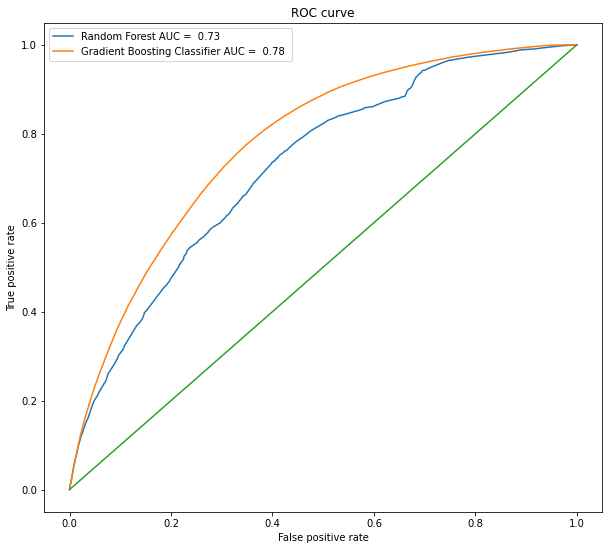

In [181]:
#Display the ROC curce

fig  =  plt . figure ( figsize = ( 10 , 9 ))

plt . plot ( fpr_rf ,  tpr_rf ,  label = 'Random Forest AUC = % 0.2f '  % rf_auc )
plt . plot ( fpr_gbc ,  tpr_gbc ,  label = 'Gradient Boosting Classifier AUC = % 0.2f '  % gbc_auc )


plt . plot ([ 0 , 1 ], [ 0 , 1 ],  linestyle = '-' ) 
plt . xlabel ( 'False positive rate' ) 
plt . ylabel ( 'True positive rate' ) 
plt . title ( 'ROC curve' ) 
plt . legend ( loc = 'best' ) 
plt . show ()

fig . savefig ( r"C:\Users\manas\OneDrive\Documents\STEVENS\sem 2\KDD\final project\results\ROC_grav_3.png" )

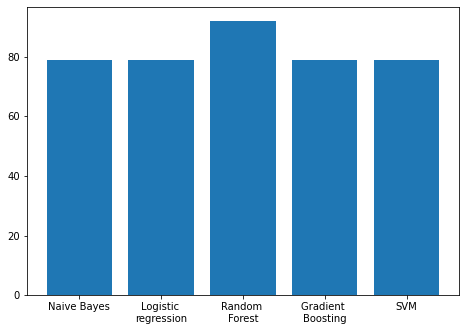

In [128]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,10,1,1])
models = ['Naive Bayes', 'Logistic \nregression', 'Random \nForest', 'Gradient \nBoosting', 'SVM']
Accuracy = [79,79,92,79,79]
ax.bar(models,Accuracy)
plt.show()